#####  Mall clustering of customers  

In the  below notebook we will be clustering and grouping customers based on thei annual income and spending score that is given to the custoners by the mall based on the customers daily spending in the mall  in this model we will be using the KMEANS CLUSTERING MODEL

In [1]:
#we willl start by importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import os
os.environ["THREADPOOLCTL_THREAD_COUNT"] = "1"


In [3]:
df =pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum().sum()

0

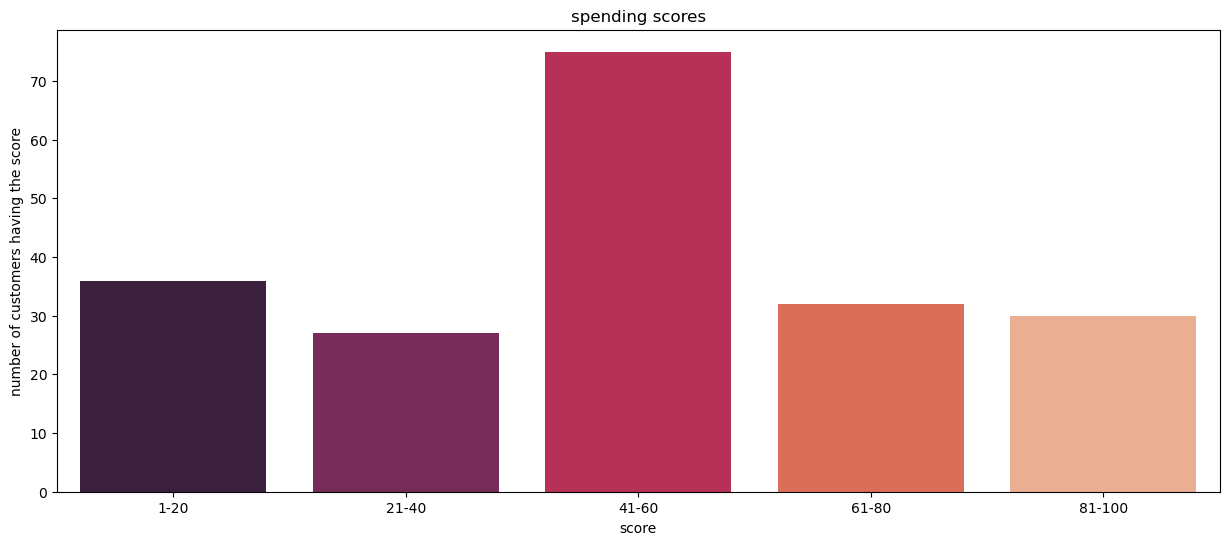

In [30]:
ss_1_20 =df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=1)& (df['Spending Score (1-100)']<=20)]
ss_21_40 =df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21)& (df['Spending Score (1-100)']<=40)]
ss_41_60 =df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41)& (df['Spending Score (1-100)']<=60)]
ss_61_80 =df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61)& (df['Spending Score (1-100)']<=80)]
ss_81_100 =df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81)& (df['Spending Score (1-100)']<=100)]

ssx =['1-20','21-40','41-60','61-80','81-100']
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette ='rocket')
plt.title('spending scores')
plt.xlabel('score')
plt.ylabel('number of customers having the score')
plt.show()

As we can clearly see above we have the most customers with a spending score of 41-60 and least from 21-40.we also have a significant amount of customers from 811-100

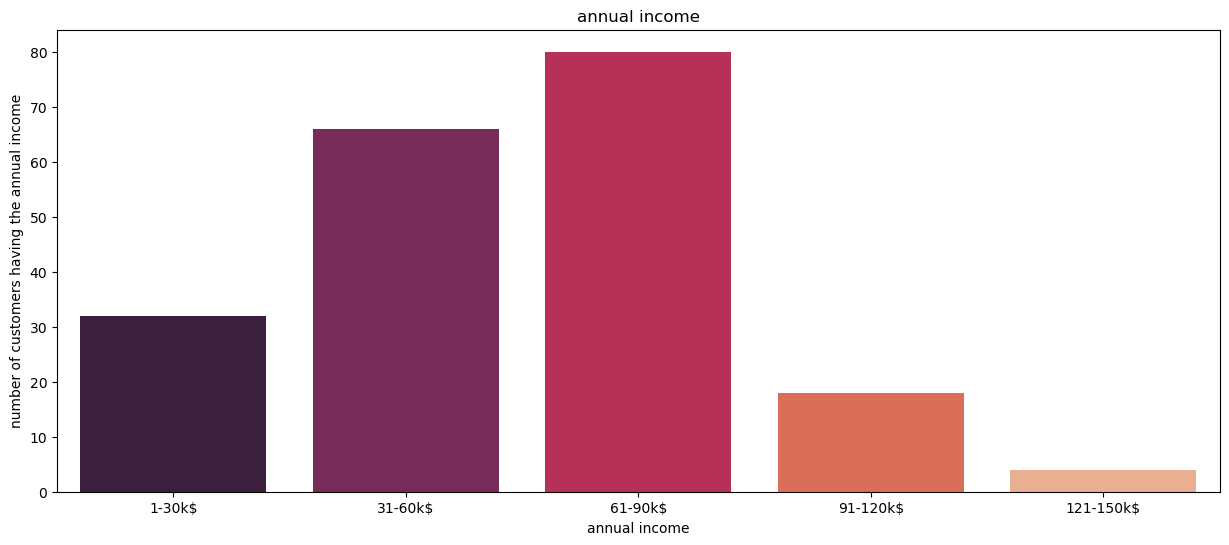

In [32]:
ai0_30=df['Annual Income (k$)'][(df['Annual Income (k$)']>=0)&(df['Annual Income (k$)']<=30)]
ai31_60=df['Annual Income (k$)'][(df['Annual Income (k$)']>=31)&(df['Annual Income (k$)']<=60)]
ai61_90=df['Annual Income (k$)'][(df['Annual Income (k$)']>=61)&(df['Annual Income (k$)']<=90)]
ai91_120=df['Annual Income (k$)'][(df['Annual Income (k$)']>=91)&(df['Annual Income (k$)']<=120)]
ai121_150=df['Annual Income (k$)'][(df['Annual Income (k$)']>=121)&(df['Annual Income (k$)']<=150)]


ssx =['1-30k$','31-60k$','61-90k$','91-120k$','121-150k$']
ssy =[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette ='rocket')
plt.title('annual income')
plt.xlabel('annual income')
plt.ylabel('number of customers having the annual income')
plt.show()

In the above barchat we can clearly see the annual most annual income eaners earn between 61-90k $and we have the least amount of poeple earning between 121-150k$

In [ ]:
.values

In [23]:
# for the folllowing line of code we will be assigning a variable x the fourth and the fifth column and we shall also
#be assiging all the values to the same variable x
X =df.iloc[:,[3,4]].values


In [24]:
'''    it is creating a KMeans object with a varying number of clusters, ranging from 1 to 10, and 
computing the within-cluster sum of squares (WCSS) for each clustering solution. The WCSS is a measureof how compact
the clusters are, and it is commonly used to determine the optimal number of clusters in k-means clustering.
The for loop iterates through the range of cluster numbers from 1 to 10, and for each iteration, it creates a KMeans object 
with the specified number of clusters (n_clusters=i) and an initialization method of "k-means++" (init='k-means++'). 
The fit method is then called on the KMeans object to fit the model to the data in X. The inertia_ attribute of the KMeans 
object is then appended to the wcss list. The inertia_ attribute gives the WCSS value for the current clustering solution.'''

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)





C:\Users\stilinski\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\stilinski\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stilinski\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\stilinski\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

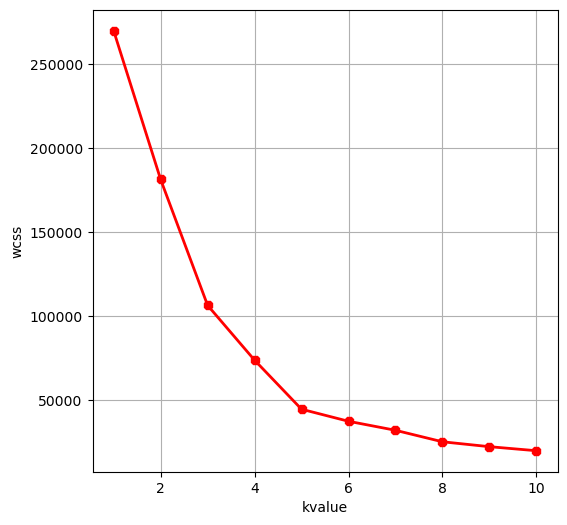

In [15]:
'''   These values can be plotted to create an "elbow plot" that shows the trade-off between the number 
of clusters and the compactness of the resulting clusters. The "elbow" of the plot indicates the point of diminishing
returns in terms of increased cluster compactness, and it is often used to determine the optimal number of clusters for a
given dataset.'''
plt.figure(figsize =(6,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth =2,color ='red',marker ='8')
plt.xlabel('kvalue')
plt.ylabel('wcss')
plt.show()


for  the above plot as its clearly shown the elbow is steepest at oround 5 that is where we have an ebow forming at that region  so as clearly shown by the code we clearly see the optimal numberof clusters to use is five clusters 

In [16]:
# For the below lines of code we specify that the clusters should be 5 and we also specify we are using the k++ ALGORITHM 
#and then we are fittin the model and we are assigning it to a varibale y

kmeans =KMeans(n_clusters =5 ,init ='k-means++',random_state =0)
#return a label for each datapoint based on thei cluster
Y=kmeans.fit_predict(X)
Y

C:\Users\stilinski\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\stilinski\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

The scatter plot is created using the plt.scatter function from the matplotlib library. The function is called multiple 
times to plot the data points in each cluster, with different colors used for each cluster. The X[Y==0,0] syntax is used to 
select the data points in the first cluster, where Y==0 is a Boolean array that is True for all data points in the first
cluster and False for all other data points. The first column of X corresponds to the "Annual Income" feature, so X[Y==0,0]
selects the "Annual Income" values for the data points in the first cluster. Similarly, X[Y==0,1] selects the 
"Spending Score" values for the data points in the first cluster.

The s=50 parameter sets the size of the markers in the scatter plot, while the c parameter specifies the color of the 
markers for each cluster. The label parameter is used to provide a label for each cluster, which is used in the legend that 
is created using the plt.legend function.

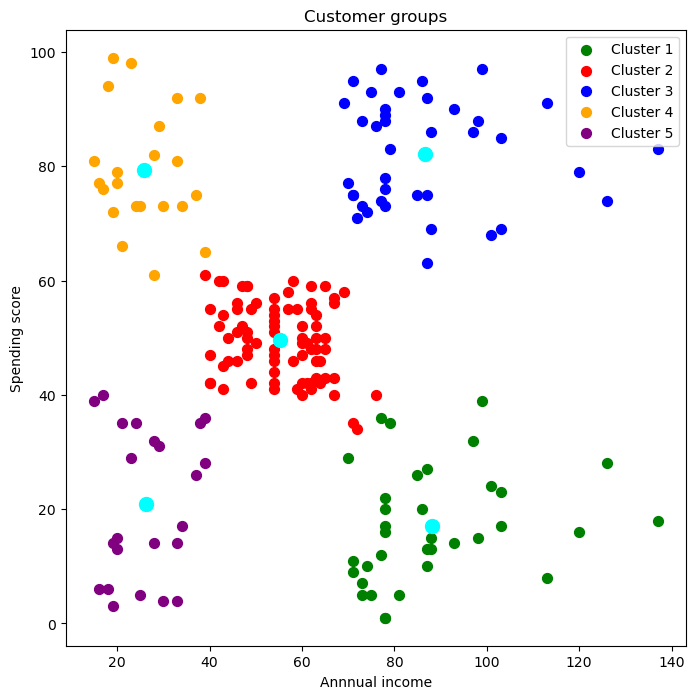

In [22]:



plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='orange', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='purple', label='Cluster 5')
plt.legend()
plt .scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c ='cyan',label='')
plt.title('Customer groups')
plt.xlabel('Annnual income')
plt.ylabel('Spending score')

plt.show()
